In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model

In [71]:
#Data Generation

g=0.05
# Generate random values for V and F
samples = 1000
V_min, V_max = 0, 20
F_min, F_max = 0, 10

V = np.random.uniform(V_min, V_max, samples)
F = np.random.uniform(F_min, F_max, samples)

scaler = MinMaxScaler()
X = np.column_stack((V, F))
X_scaled = scaler.fit_transform(X)

# Calculating the deflection using the equation derived from analytical solution
y = 2.4*(10**-5) * V**2 + 0.32 * F



In [72]:
# Constraints
g = 0.05
y_min, y_max = 0.05, 0.3

# Class labels
labels = np.where((y > g) & (y < 6 * g), 1, 0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)
X_train.shape


(800, 2)

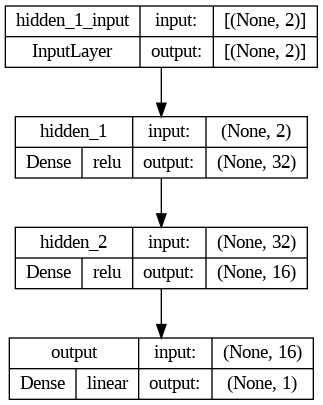

In [74]:
# Define the model

model = Sequential()
model.add(Dense(32, activation = "relu", input_dim=2,name='hidden_1'))
model.add(Dense(16, activation = "relu",name='hidden_2'))

model.add(Dense(1,name='output'))

#visulize model
plot_model(model, show_shapes=True, show_layer_names=True,show_layer_activations=True)



In [77]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9800
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9875
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0468 - accuracy: 0.9875
Epoch 4/50
25/25 [==============================] - 0s 13ms/step - loss: 0.0470 - accuracy: 0.9812
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0467 - accuracy: 0.9875
Epoch 6/50
25/25 [==============================] - 0s 13ms/step - loss: 0.0448 - accuracy: 0.9825
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0442 - accuracy: 0.9887
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9850
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9875
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.9875
Epoch 11/50
25/